<a href="https://colab.research.google.com/github/Pakin49/Naruto-Hand-Sign-detection/blob/main/Naruto_Hand_sign_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("vikranthkanumuru/naruto-hand-sign-dataset")

# print("Path to dataset files:", path)

100%|██████████| 2.02G/2.02G [00:24<00:00, 89.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vikranthkanumuru/naruto-hand-sign-dataset/versions/5


In [ ]:
import os
import pickle
#from skimage.io import imread
import cv2
from cv2 import imread
from skimage.transform import resize
import numpy as np

In [ ]:
IMG_SIZE = 480

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: Mountpoint must not contain a space.

# Script for generating a dataset with removed background

In [ ]:
# !uv pip install rembg onnxruntime-gpu

Using Python 3.12.12 environment at: /usr
Resolved 35 packages in 482ms
Prepared 5 packages in 2.92s
Installed 5 packages in 13ms
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnxruntime-gpu==1.23.2
 + pymatting==1.1.14
 + rembg==2.0.68


In [ ]:
# from rembg import remove
# from PIL import Image

# def read_removebg_img(path):
#   img = imread(path)
#   # img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
#   # plt.imshow(img)
#   # plt.show()

#   img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#   pil_img = Image.fromarray(img_rgb)

#   img_nobg = remove(pil_img)    # background removed (RGBA)
#   img_nobg = np.array(img_nobg)

#   output_bgr = cv2.cvtColor(img_nobg, cv2.COLOR_RGBA2BGR).astype('uint8')

#   return output_bgr

# categories = ['bird', 'boar', 'dog', 'dragon', 'hare', 'horse',
#               'monkey', 'ox', 'ram', 'rat', 'snake', 'tiger']

# # Test directory
# input_dir_train = path + '/Pure Naruto Hand Sign Data/train/'
# output_dir_train = 'dataset/train/'
# for cat in categories:
#     os.makedirs(os.path.join(output_dir_train, cat), exist_ok=True)

# for category_idx, category in enumerate(categories):
#     in_path = os.path.join(input_dir_train, category)
#     out_path = os.path.join(output_dir_train, category)

#     for file in os.listdir(in_path):
#         img_path = os.path.join(in_path, file)

#         processed = read_removebg_img(img_path)

#         save_path = os.path.join(out_path, os.path.splitext(file)[0] + ".png")
#         cv2.imwrite(save_path, processed)

# # Train directory
# input_dir_test = path + '/Pure Naruto Hand Sign Data/test/'
# output_dir_test = 'dataset/test/'
# for cat in categories:
#     os.makedirs(os.path.join(output_dir_test, cat), exist_ok=True)

# for category_idx, category in enumerate(categories):
#     in_path = os.path.join(input_dir_test, category)
#     out_path = os.path.join(output_dir_test, category)

#     for file in os.listdir(in_path):
#         img_path = os.path.join(in_path, file)

#         processed = read_removebg_img(img_path)

#         save_path = os.path.join(out_path, os.path.splitext(file)[0] + ".png")
#         cv2.imwrite(save_path, processed)


In [ ]:
# !zip -r /content/naruto_dataset.zip /content/naruto_dataset
# !unzip naruto_dataset.zip -d naruto_dataset # For unzipping

  adding: content/dataset/ (stored 0%)
  adding: content/dataset/test/ (stored 0%)
  adding: content/dataset/test/boar/ (stored 0%)
  adding: content/dataset/test/boar/boar_IMG_476e19f6e-4d5b-11ea-b58b-0242ac1c0002.png (deflated 4%)
  adding: content/dataset/test/boar/boar_IMG_236293c2a-4d5b-11ea-b58b-0242ac1c0002.png (deflated 4%)
  adding: content/dataset/test/boar/boar_IMG_13074c5c4-4d5b-11ea-b58b-0242ac1c0002.png (deflated 2%)
  adding: content/dataset/test/boar/boar_IMG_02a62b902-4d5b-11ea-b58b-0242ac1c0002.png (deflated 5%)
  adding: content/dataset/test/boar/boar_IMG_441fde7c6-4d5b-11ea-b58b-0242ac1c0002.png (deflated 2%)
  adding: content/dataset/test/boar/boar_IMG_370c35bc2-4d5b-11ea-b58b-0242ac1c0002.png (deflated 2%)
  adding: content/dataset/test/boar/boar_IMG_33c11dd18-4d5b-11ea-b58b-0242ac1c0002.png (deflated 2%)
  adding: content/dataset/test/boar/boar_IMG_26af67576-4d5b-11ea-b58b-0242ac1c0002.png (deflated 2%)
  adding: content/dataset/test/boar/boar_IMG_05eee5bea-4d5b-

# Read images from dataset

In [ ]:
def read_img_gray(path):
  img = cv2.imread(path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)).astype('uint8')
  return img

In [ ]:
# Read dataset
path = '/content/dataset/'
train_dir = path + 'train/'
test_dir = path + 'test/'
categories = ['bird', 'boar', 'dog', 'dragon', 'hare', 'horse', 'monkey', 'ox', 'ram', 'rat', 'snake', 'tiger']

X = []
y = []
for category_idx, category in enumerate(categories):
  for file in os.listdir(os.path.join(train_dir, category)):
    img_path = os.path.join(train_dir, category, file)
    img_flat = read_img_gray(img_path).flatten()
    X.append(img_flat)
    y.append(category_idx)

  for file in os.listdir(os.path.join(test_dir, category)):
    img_path = os.path.join(test_dir, category, file)
    img_flat = read_img_gray(img_path).flatten()
    X.append(img_flat)
    y.append(category_idx)

In [ ]:
# # test data
# input_dir = path + '/Pure Naruto Hand Sign Data/test/'

# path = '/content/dataset/'
# input_dir = path + 'test/'
# categories = ['bird', 'boar', 'dog', 'dragon', 'hare', 'horse', 'monkey', 'ox', 'ram', 'rat', 'snake', 'tiger']

# X_test = []
# y_test = []
# for category_idx, category in enumerate(categories):
#   for file in os.listdir(os.path.join(input_dir, category)):
#     img_path = os.path.join(input_dir, category, file)
#     img_flat = read_img_gray(img_path).flatten()
#     X_test.append(img_flat)
#     y_test.append(category_idx)

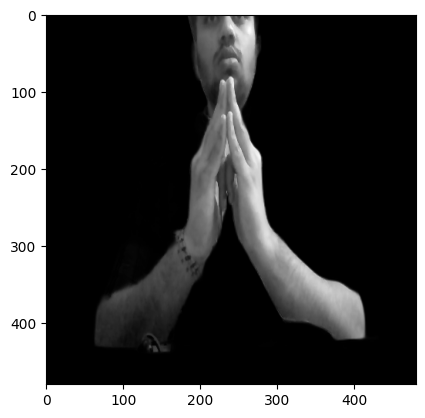

In [ ]:
import matplotlib.pyplot as plt
image_to_plot = X[2].reshape(IMG_SIZE, IMG_SIZE)
rgb_img = cv2.cvtColor(image_to_plot, cv2.COLOR_GRAY2RGB)
plt.imshow(rgb_img)
plt.show()

In [ ]:
len(categories)

12

# Machine learning with image feature extraction

In [55]:
from skimage.feature import hog
from skimage import color, exposure

def hog(image):
    # Convert to grayscale
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize for consistency
    gray = cv2.resize(gray, (128, 128))

    # Extract HOG
    features, hog_image = hog(
        gray,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        visualize=True,
        transform_sqrt=True
    )

    return features, hog_image


In [56]:
def hu_moment(image):
    # Convert to grayscale
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Calculate moments
    moments = cv2.moments(thresh)

    # Hu moments (7 values)
    hu = cv2.HuMoments(moments).flatten()

    # Log transform for numerical stability
    for i in range(7):
        hu[i] = -1 * np.sign(hu[i]) * np.log10(abs(hu[i]) + 1e-9)

    return hu


In [ ]:
def feature_extraction(input_img):
  X_features  = []
  mean = np.mean(input_img)
  std = np.std(input_img)
  median = np.median(input_img)
  min = np.min(input_img)
  max = np.max(input_img)
  var = np.var(input_img)
  hog, _ = hog(input_img)
  hu = hu_moment(input_img)

  X_features.append(mean)
  X_features.append(std)
  X_features.append(median)
  X_features.append(min)
  X_features.append(max)
  X_features.append(var)
  X_features.extend(hog)
  X_features.extend(hu)



  return X_features

In [ ]:
a = np.array([[1, 2, 3]])
a = np.concatenate((a, np.array([[1, 2, 3]])))

a = [[1,2,3]]
a.append([1,2,3])
print(a)

[[1, 2, 3], [1, 2, 3]]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt



1. Bayes with feature extraction
2. KNN with feature extraction
3. Keras with CNN layer
4. Transfer learning
5. PCA + NN

